<a href="https://colab.research.google.com/github/gsangf10/model_train/blob/main/Fish_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# dataset 처리

In [3]:
# 머신러닝 알고리즘
# KNN - 최근접 이웃 알고리즘

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Big Data/dataset/Fish.csv')

# 지도 학습 -> 답을 제시함으로 학습시킴
# 학습 데이터
# 정답 데이터

# Weight(학습), Species(정답)
weight = df['Weight']
species = df['Species']

# 수학적인 알고리즘 처리 -> 배열(numpy)
weight.values
species.values

# target(정답 1, 나머지 0)
df['target'] = 0

# 물고기 종류 확인
df['Species'].unique()

# Bream의 target 마킹
df['target'] = 0 # target 컬럼 만들기(초기값 0)

idx = df['Species'] == 'Bream' # 조건 인덱싱으로 Bream인 인덱스 찾기

# 판다스 인덱싱 -> loc, iloc
df.loc[0:10, 'Species' : 'Length1'] 

df.loc[idx, 'target'] = 1 # 판다스 인덱싱을 이용해 데이터 수정하기

# 학습데이터
idx2 = (df['Species'] == 'Bream') | (df['Species'] == 'Smelt')
df2 = df[idx2]
train_set = df2[['Weight', 'Length1']]

# 정답데이터 
target_set = df2['target']

# 배열로 변환
train_set = train_set.values
target_set = target_set.values

# 산점도

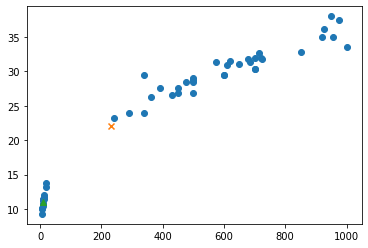

In [11]:
# 산점도

import matplotlib.pyplot as plt

plt.scatter(train_set[:,0], train_set[:,1])
plt.scatter(230, 22, marker='x')
plt.scatter(10, 11, marker='^')

# KNN

In [15]:
# KNN
from sklearn.neighbors import KNeighborsClassifier # KNN 알고리즘 모델

kn = KNeighborsClassifier()

# 학습
kn.fit(train_set, target_set)

# 평가
kn.score(train_set, target_set) # 1.0 ==> 100%

# 예측 (1 -> Bream, 0 -> Smelt)
# kn.predict([[230, 22]])
kn.predict([[10, 11]])


array([0])

In [21]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# 학습 데이터와 테스트 데이터가 동일하면 모델 학습 평가가 100이 나오게 되는데 이 100은 의미가 없음. 학습시킨 데이터와는 다른 데이터로 평가해야 유의미한 값이 나옴

train_data = train_set[:35,:]
test_data = train_set[35:, ]

train_target = target_set[:35]
test_target = target_set[35:]

kn.fit(train_data, train_target) 
kn.score(test_data, test_target)

# 이번엔 학습 평가 결과가 0이 나옴. 학습을 시킬 때 학습 데이터에 빙어에 대한 데이터가 단 하나도 존재하지 않기 때문. 학습 데이터를 마련할 때는 데이터가 골고루 분포되어 있어야 하므로
# 보통 데이터를 한번 섞어줌.

# 넘파이의 shuffle을 이용해 배열의 원소들을 섞을 수 있음. 이 때, 학습 데이터와 정답 데이터가 같은 위치로 섞여야 하기 때문에 두 배열데이터를 붙여서 하나의 배열로 
# 만든 후 섞어주어야 함

# 넘파이 합치기

target_arr = np.expand_dims(target_set, axis=1) # 넘파이에서 배열을 합치려면 대상 배열이 2차원부터 가능하기 때문에 1차원 배열인 정답데이터의 차원을 확장함. 각 정답 데이터가 행에 붙어야 하므로 확장 방향은 세로축
con_data = np.concatenate((train_set, target_arr), axis=1)
np.random.shuffle(con_data) 


# 배열 다시 나누기
rand_train_data = con_data[:35, :2]
rand_train_target = con_data[:35, 2:]
rand_test_data = con_data[35:, :2]
rand_test_target = con_data[35:, 2:]

# target 배열은 1차원 배열이어야 하므로 차원 축소
rand_train_target = np.squeeze(rand_train_target, axis=1)
rand_test_target = np.squeeze(rand_test_target, axis=1)

# 훈련 후 재평가
kn = kn.fit(rand_train_data, rand_train_target)
kn.score(rand_test_data, rand_test_target)
# 예측 (1 -> Bream, 0 -> Smelt)
# kn.predict([[230, 22]])
kn.predict([[10, 11]])

array([0.])